In [1]:
import pandas as pd
import numpy as np

### Load the Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df = pd.read_excel(url)

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# Rename columns for easier reference
df.columns = ["cement", "slag", "fly_ash", "water", "superplasticizer",
              "coarse_aggregate", "fine_aggregate", "age", "strength"]

### Check for Missing Values

In [7]:
print(df.isnull().sum())  # No missing values in this dataset

cement              0
slag                0
fly_ash             0
water               0
superplasticizer    0
coarse_aggregate    0
fine_aggregate      0
age                 0
strength            0
dtype: int64


### Preparing Data

In [9]:
X = df.drop(columns=["strength"])  # Features
y = df["strength"]  # Target variable

### Normalize Features

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split into Train & Test Sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Build the Neural Network

In [15]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),   # Input layer
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # Regression output
])

### Compile the Model

In [17]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

### Train the Model

In [19]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1434.0238 - mae: 33.9106 - val_loss: 1362.0813 - val_mae: 33.6134
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1263.6067 - mae: 31.6148 - val_loss: 925.6525 - val_mae: 26.7719
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 729.5344 - mae: 22.3248 - val_loss: 313.5111 - val_mae: 14.4631
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 305.5715 - mae: 13.7744 - val_loss: 197.4672 - val_mae: 11.7002
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 221.7449 - mae: 12.0489 - val_loss: 196.2385 - val_mae: 11.6254
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 199.3920 - mae: 11.3877 - val_loss: 181.9347 - val_mae: 11.3282
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 215.3596 - mae: 12.0620 - val_loss: 174.1063 - val_mae: 11.1091
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 187.0425 - mae: 10.9125 - val_loss: 167.5626 - val_mae: 10.9011
Epoch 9/100


### Evaluate the Model

In [21]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f} MPa")  # Mean Absolute Error in MPa

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.4000 - mae: 4.7736 
Test MAE: 4.67 MPa


In [22]:
# Make Predictions
predictions = model.predict(X_test[:5])
print("Sample Predictions:", predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Sample Predictions: [44.9129   40.926693 65.20126  36.416653 10.896308]


### Visualization

#### Plot Training Loss & MAE

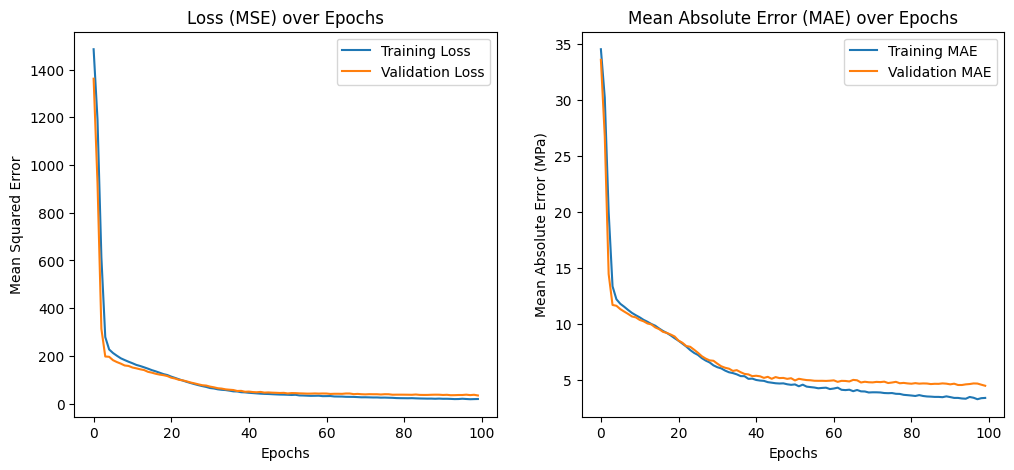

In [25]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Loss (MSE)
    ax[0].plot(history.history['loss'], label='Training Loss')
    ax[0].plot(history.history['val_loss'], label='Validation Loss')
    ax[0].set_title('Loss (MSE) over Epochs')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Mean Squared Error')
    ax[0].legend()

    # Plot MAE
    ax[1].plot(history.history['mae'], label='Training MAE')
    ax[1].plot(history.history['val_mae'], label='Validation MAE')
    ax[1].set_title('Mean Absolute Error (MAE) over Epochs')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Mean Absolute Error (MPa)')
    ax[1].legend()

    plt.show()

# Call the function to plot the graphs
plot_learning_curves(history)

## Conclusion: 

-  Model is learning well and generalizing properly.
-  No significant overfitting: The validation and training curves are closely aligned.
-  Final MAE (~5 MPa):<br>  
   - The model predicts concrete strength with an average error of ±5 MPa.<br>  
   - This means the predictions are reasonably accurate for practical use.  